# Importing Required Libraries

In [114]:
# Data handling and visualization
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

sns.set_style('whitegrid')
# Machine learning utilities
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score


# Load Dataset

In [33]:
df = pd.read_csv("D:/Smita/LLM/Credit Score 2/Rap F2.csv")
df.head()




,Ownership type,Sex,Trade License,Sourcing Type,Promotion Channel,Business Type,Business Duration\n(Years),Product Type,Availability of separate office,Marital Status,Permanent Resident,Other profession,Business Duration with RedX\n(Months),Number of Business Unit,Number of Employee,Business Nature,Risk Score,Risk
0,LTD,male,1,Foreign Source,Online only (FB + Other),F-commerce+ E-commerce,6.0,Food items,1,Married,Outside Dhaka,Yes,6,1,4,Seasonal Product,65.0,Bad
1,Partnerships,female,0,Foreign Source,Online only (FB + Other),E-commerce (website) only,2.0,Clothing & Accessories,1,Unmarried,Outside Dhaka,No,7,2,11,Seasonal Product,70.4,Bad
2,Sole Proprietorships,male,0,Foreign Source,Only Facebook,F-commerce only,7.0,Clothing & Accessories,1,Unmarried,Outside Dhaka,Yes,36,1,4,Seasonal Product,68.0,Bad
3,Partnerships,male,0,Own Product,Online only (FB + Other),E-commerce (website) only,8.0,Electronics & Gadget,1,Married,Outside Dhaka,No,40,2,4,Seasonal Product,73.5,Good
4,Partnerships,male,0,Local Source,Online only (FB + Other),E-commerce (website) only,1.0,Cosmetics,1,Unmarried,Outside Dhaka,Yes,12,2,1,Seasonal Product,65.8,Bad


# Check Target Variable Distribution

In [119]:
df["Risk"].value_counts()


Risk
Good    636
Bad     364
Name: count, dtype: int64

# Dataset Information Overview

In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Ownership type                        1000 non-null   object 
 1   Sex                                   1000 non-null   object 
 2   Trade License                         1000 non-null   int64  
 3   Sourcing Type                         1000 non-null   object 
 4   Promotion Channel                     1000 non-null   object 
 5   Business Type                         1000 non-null   object 
 6   Business Duration
(Years)             1000 non-null   float64
 7   Product Type                          1000 non-null   object 
 8   Availability of separate office       1000 non-null   int64  
 9   Marital Status                        1000 non-null   object 
 10  Permanent Resident                    1000 non-null   object 
 11  Other profession  

# Exploring Dataset Structure and Summary Statistics

In [36]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ownership type,1000,4,Sole Proprietorships,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trade License,1000.0,NaN,NaN,NaN,0.504,0.500234,0.0,0.0,1.0,1.0,1.0
Sourcing Type,1000,3,Local Source,358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promotion Channel,1000,4,Online & Offline,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Business Type,1000,6,E-commerce (website) only,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Business Duration\n(Years),1000.0,NaN,NaN,NaN,4.4501,3.101903,0.6,1.5,5.0,7.0,15.0
Product Type,1000,5,Others,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Availability of separate office,1000.0,NaN,NaN,NaN,0.599,0.490346,0.0,0.0,1.0,1.0,1.0
Marital Status,1000,2,Married,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking for Missing Values

In [37]:
df.isna().sum()

Ownership type                           0
Sex                                      0
Trade License                            0
Sourcing Type                            0
Promotion Channel                        0
Business Type                            0
Business Duration\n(Years)               0
Product Type                             0
Availability of separate office          0
Marital Status                           0
Permanent Resident                       0
Other profession                         0
Business Duration with RedX\n(Months)    0
Number of Business Unit                  0
Number of Employee                       0
Business Nature                          0
Risk Score                               0
Risk                                     0
dtype: int64

# Viewing Column Names

In [39]:
df.columns

Index(['Ownership type', 'Sex', 'Trade License', 'Sourcing Type',
       'Promotion Channel', 'Business Type', 'Business Duration\n(Years)',
       'Product Type', 'Availability of separate office', 'Marital Status',
       'Permanent Resident', 'Other profession',
       'Business Duration with RedX\n(Months)', 'Number of Business Unit',
       'Number of Employee', 'Business Nature', 'Risk Score', 'Risk'],
      dtype='object')

# Numerical Features vs. Risk

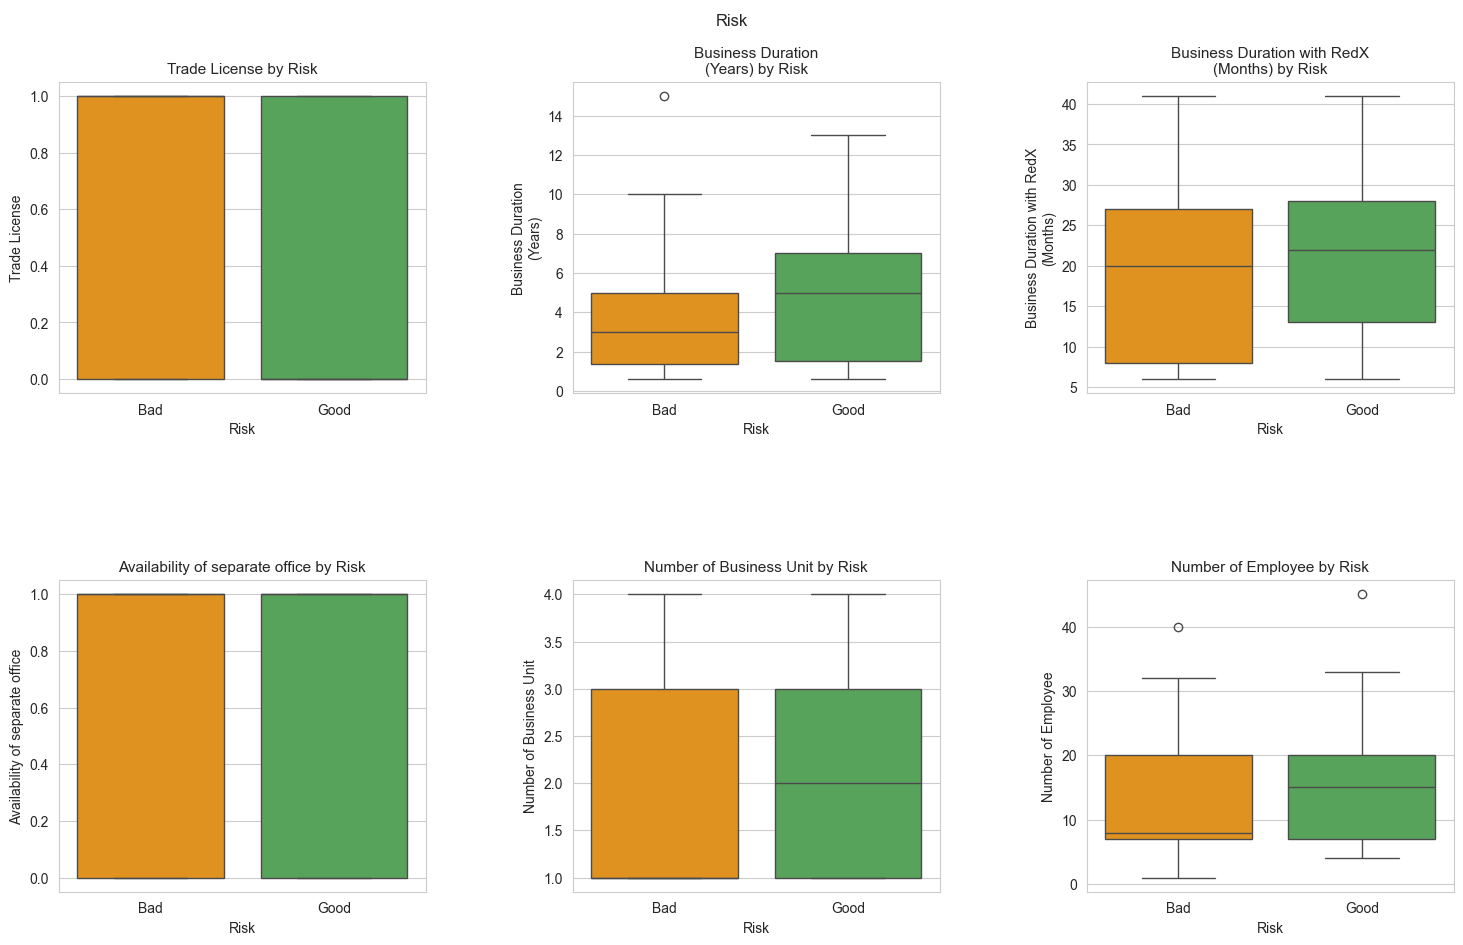

In [129]:
num_cols = ["Trade License", "Business Duration\n(Years)", "Business Duration with RedX\n(Months)", "Availability of separate office", "Number of Business Unit", "Number of Employee"]

custom_palette = {'Good': '#4CAF50',  # Green
                  'Bad': '#FF9800'}   # Orange

fig = plt.figure(figsize=(18, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    ax = sns.boxplot(
        x='Risk', y=col, data=df,
        hue='Risk',
        hue_order=['Good', 'Bad'],
        palette=custom_palette
    )
    plt.title(f"{col} by Risk", fontsize=11)
    plt.xlabel("Risk")
    plt.ylabel(col)
    
    # Remove individual legends
    if ax.get_legend() is not None:
        ax.legend_.remove()

# Create shared legend at top
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels,title='Risk',loc='upper center',ncol=2,frameon=False,fontsize=11,title_fontsize=12)

plt.subplots_adjust(top=0.92, hspace=0.6, wspace=0.4)
plt.show()



# Define Categorical Columns

In [42]:
categorical_cols=["Ownership type", "Sex", "Sourcing Type",
       "Promotion Channel", "Business Type", "Product Type", "Availability of separate office", "Marital Status",
       "Permanent Resident", "Other profession",  "Business Nature"]

# Categorical Features vs. Risk

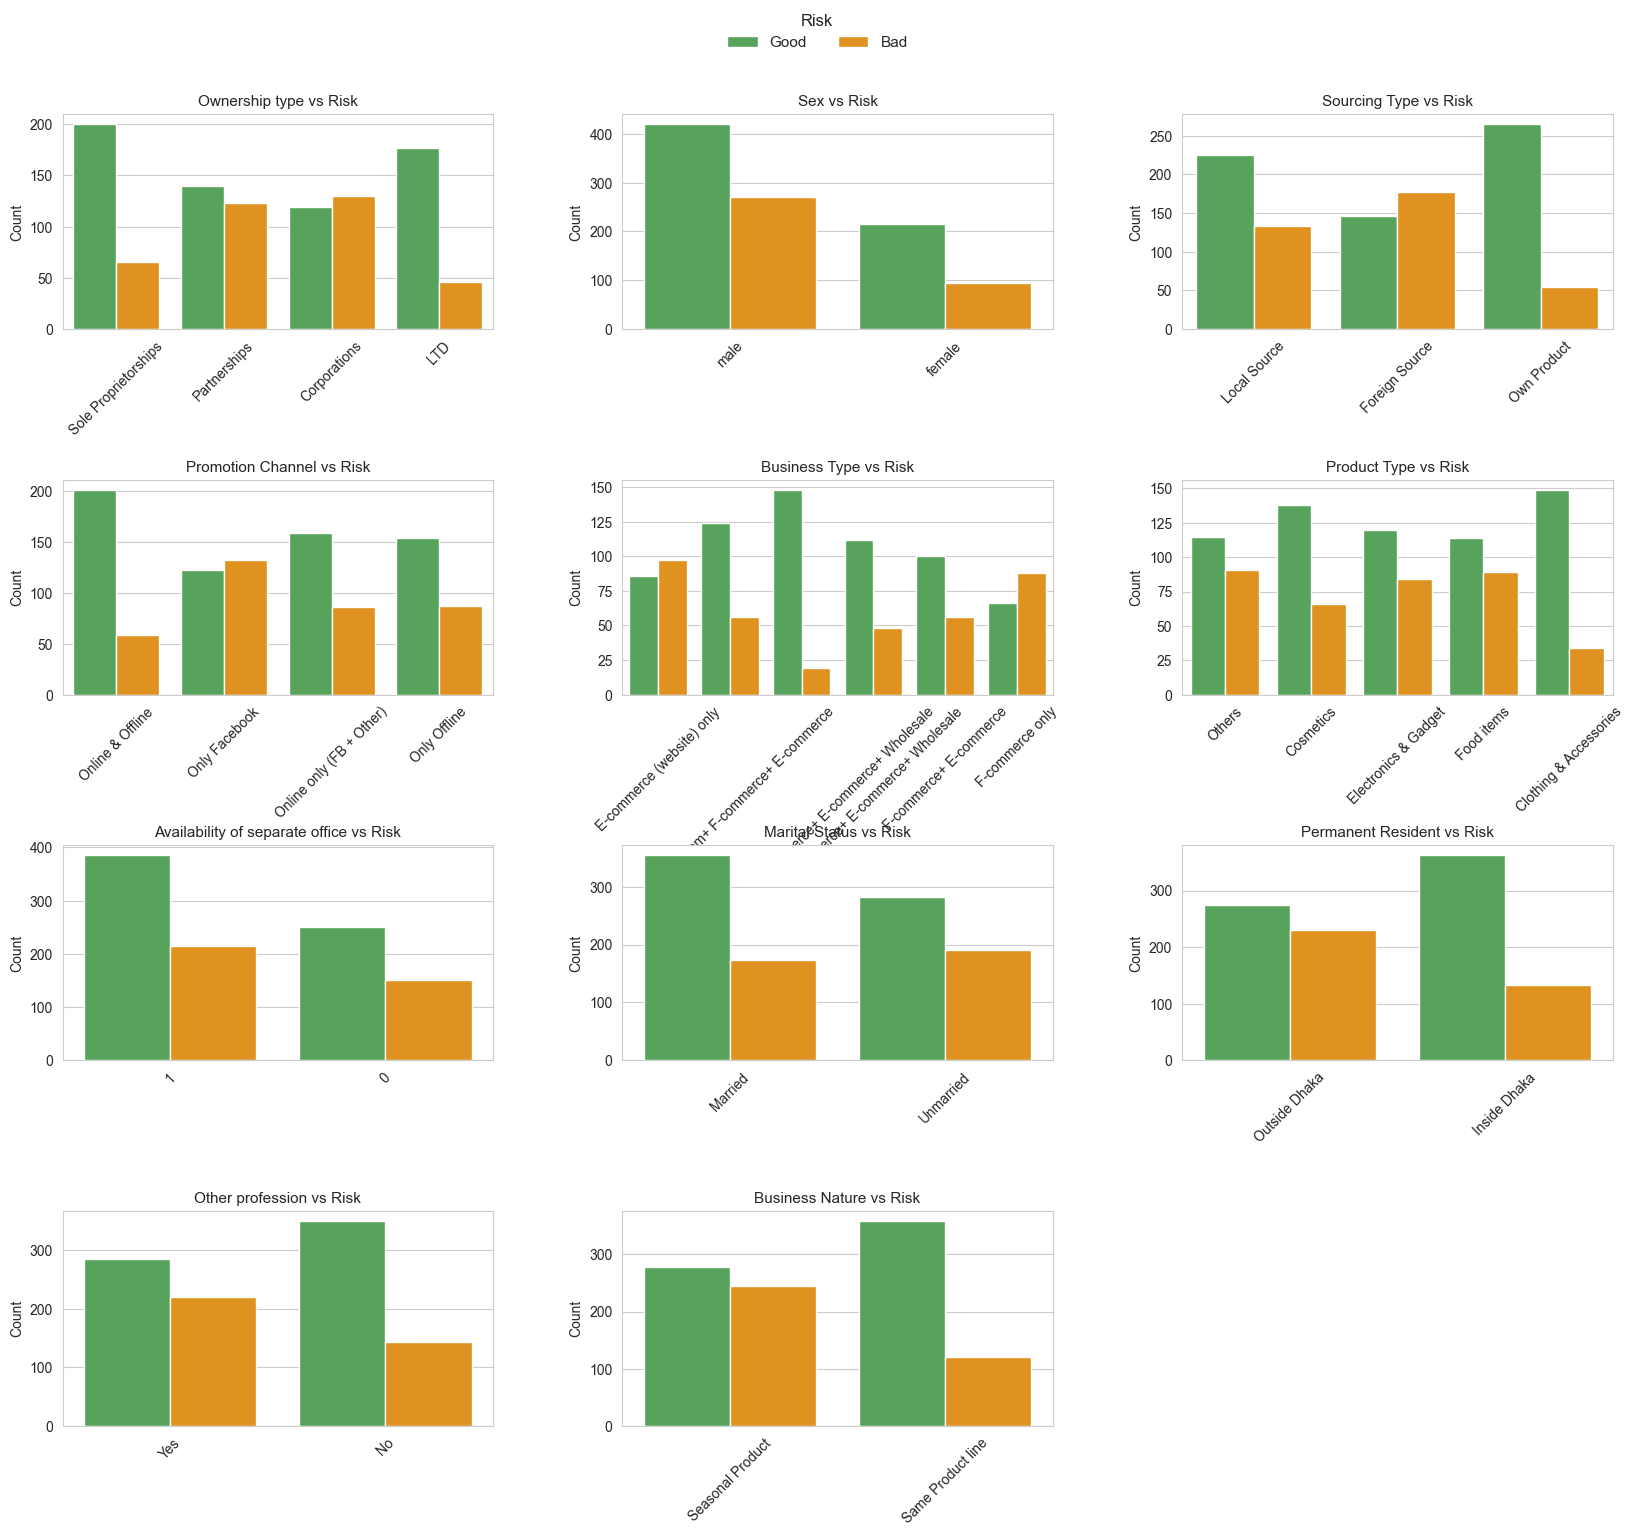

In [128]:

custom_palette = {'Good': '#4CAF50',  # Green
                  'Bad': '#FF9800'}   # Orange

fig = plt.figure(figsize=(20, 16))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 3, i + 1)
    ax = sns.countplot(
        data=df, x=col, hue='Risk',
        palette=custom_palette,           
        hue_order=['Good', 'Bad'],        
        order=df[col].value_counts().index
    )
    plt.title(f"{col} vs Risk", fontsize=11)
    plt.xticks(rotation=45)
    plt.xlabel("")
    plt.ylabel("Count")

    if ax.get_legend() is not None:
        ax.legend_.remove()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels,title='Risk',loc='upper center',ncol=2,frameon=False,fontsize=11,title_fontsize=12)

plt.subplots_adjust(top=0.93, hspace=0.7, wspace=0.3)
plt.show()




In [ ]:
#  Segmentization of the Numerical Values

In [183]:
# Create bins for numerical variables
df_bins = df.copy()

# 1. Business Duration with RedX (Months)
df_bins['Business Duration with RedX (Category)'] = pd.cut(
    df_bins['Business Duration with RedX\n(Months)'],
    bins=[0, 11, 23, float('inf')],
    labels=['6-11 months', '12-23 months', '24+ months']
)

# 2. Business Duration (Years)
df_bins['Business Duration (Category)'] = pd.cut(
    df_bins['Business Duration\n(Years)'],
    bins=[0, 1.99, 5, float('inf')],
    labels=['<2 years', '2-5 years', '>5 years']
)

# 3. Number of Employees
df_bins['Number of Employee (Category)'] = pd.cut(
    df_bins['Number of Employee'],
    bins=[0, 10, float('inf')],
    labels=['Less than 10', 'More than 10']
)

# 4. Number of Business Units - Corrected bins for values 1,2,3,4
df_bins['Number of Business Unit (Category)'] = pd.cut(
    df_bins['Number of Business Unit'],
    bins=[0, 1, 3, 4],  # Adjusted for your actual values 1,2,3,4
    labels=['1 unit', '2-3 units', '4 units']
)

# Display the binned columns
print("Numerical variables segmented into categories:")

print("\nBusiness Duration Variables:")
display(df_bins[[
    'Business Duration with RedX\n(Months)', 
    'Business Duration with RedX (Category)',
    'Business Duration\n(Years)',
    'Business Duration (Category)'
]].head(10))

print("\nEmployee and Business Unit Variables:")
display(df_bins[[
    'Number of Employee',
    'Number of Employee (Category)',
    'Number of Business Unit',
    'Number of Business Unit (Category)'
]].head(10))
# print("Numerical variables segmented into categories:")
# display(display_df.style.set_properties(**{'text-align': 'center'}).set_table_styles([
#     {'selector': 'th', 'props': [('text-align', 'center')]}


Numerical variables segmented into categories:
Numerical variables segmented into categories:

Business Duration Variables:


,Business Duration with RedX\n(Months),Business Duration with RedX (Category),Business Duration\n(Years),Business Duration (Category)
0,6,6-11 months,6.0,>5 years
1,7,6-11 months,2.0,2-5 years
2,36,24+ months,7.0,>5 years
3,40,24+ months,8.0,>5 years
4,12,12-23 months,1.0,<2 years
5,6,6-11 months,10.0,>5 years
6,12,12-23 months,3.0,2-5 years
7,12,12-23 months,1.0,<2 years
8,12,12-23 months,5.0,2-5 years
9,7,6-11 months,1.0,<2 years



Employee and Business Unit Variables:


,Number of Employee,Number of Employee (Category),Number of Business Unit,Number of Business Unit (Category)
0,4,Less than 10,1,1 unit
1,11,More than 10,2,2-3 units
2,4,Less than 10,1,1 unit
3,4,Less than 10,2,2-3 units
4,1,Less than 10,2,2-3 units
5,11,More than 10,1,1 unit
6,4,Less than 10,1,1 unit
7,11,More than 10,2,2-3 units
8,4,Less than 10,2,2-3 units
9,4,Less than 10,1,1 unit


### Interpretation of Numeric Analaysis


Risk Distribution by Business Duration with RedX (Category):


Risk,Good,Bad
Business Duration with RedX (Category),,
6-11 months,49.52,50.48
12-23 months,70.76,29.24
24+ months,69.16,30.84


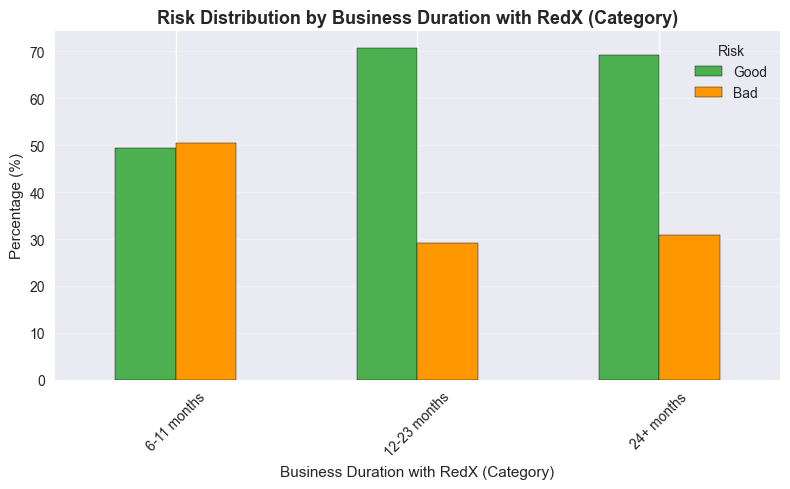


Risk Distribution by Business Duration (Category):


Risk,Good,Bad
Business Duration (Category),,
<2 years,53.38,46.62
2-5 years,62.29,37.71
>5 years,74.34,25.66


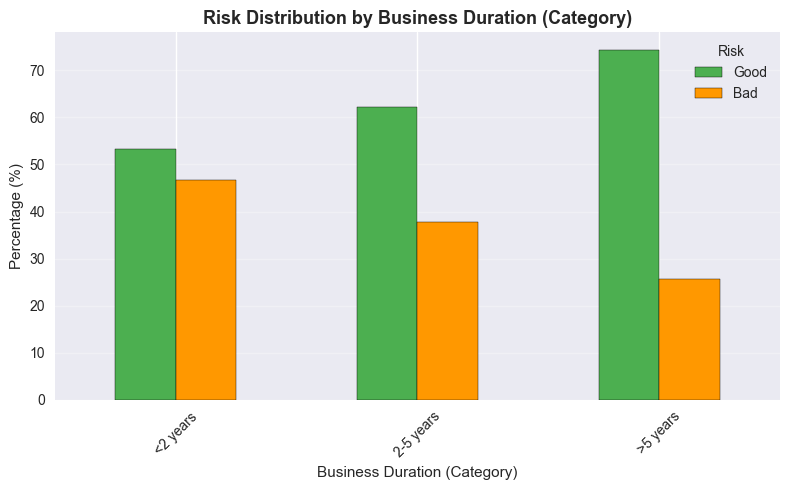


Risk Distribution by Number of Employee (Category):


Risk,Good,Bad
Number of Employee (Category),,
Less than 10,57.8,42.2
More than 10,69.4,30.6


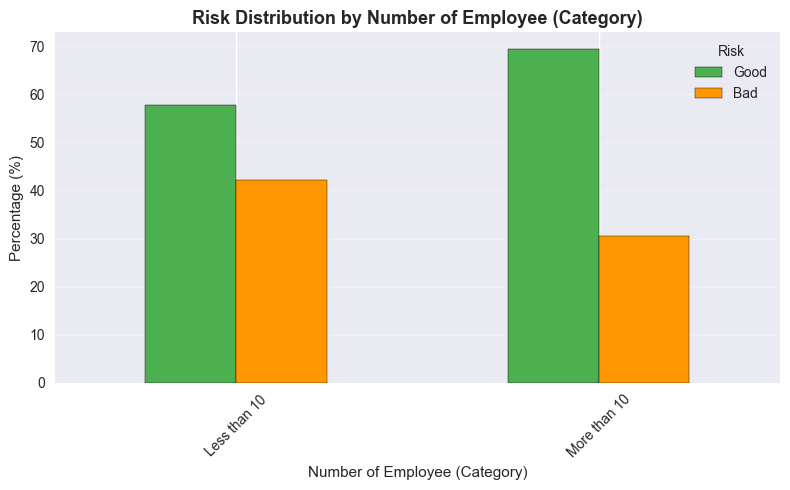


Risk Distribution by Number of Business Unit (Category):


Risk,Good,Bad
Number of Business Unit (Category),,
1 unit,54.22,45.78
2-3 units,72.84,27.16
4 units,73.05,26.95


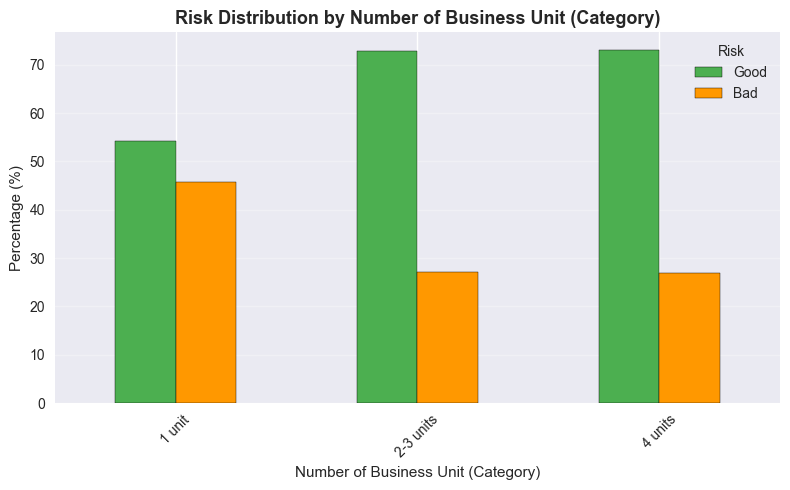

In [186]:
# Risk Distribution by Binned Categories
for col in ['Business Duration with RedX (Category)', 
            'Business Duration (Category)', 
            'Number of Employee (Category)', 
            'Number of Business Unit (Category)']:
    
    cross_tab = pd.crosstab(df_bins[col], df_bins['Risk'], normalize='index') * 100
    cross_tab = cross_tab[['Good', 'Bad']].round(2)
    print(f"\nRisk Distribution by {col}:")
    display(cross_tab)

    # Plot with custom colors (Good = Green, Bad = Red)
    cross_tab.plot(
        kind='bar',
        color=['#4CAF50', '#FF9800'],
        figsize=(8, 5),
        edgecolor='black'
    )
    plt.title(f"Risk Distribution by {col}", fontsize=13, fontweight='bold')
    plt.ylabel("Percentage (%)")
    plt.xlabel(col)
    plt.legend(title="Risk", loc='upper right', labels=['Good', 'Bad'])
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

Conclusion:
1. Business Tenor: Longer business relationships show much lower risk.
2. Business Units: More business units mean much less risk.
3. Employee Count: More employees mean much less risk.

# Cramer’s V — Strength of Association (Categorical)

Cramer's V — Strength of Association with Risk:


,Variable,Cramer's V
2,Sourcing Type,0.312506
4,Business Type,0.309354
0,Ownership type,0.276155
9,Business Nature,0.220417
3,Promotion Channel,0.211957
10,Business Duration with RedX (Category),0.192069
7,Permanent Resident,0.191545
13,Number of Business Unit (Category),0.189114
5,Product Type,0.186613
11,Business Duration (Category),0.170908


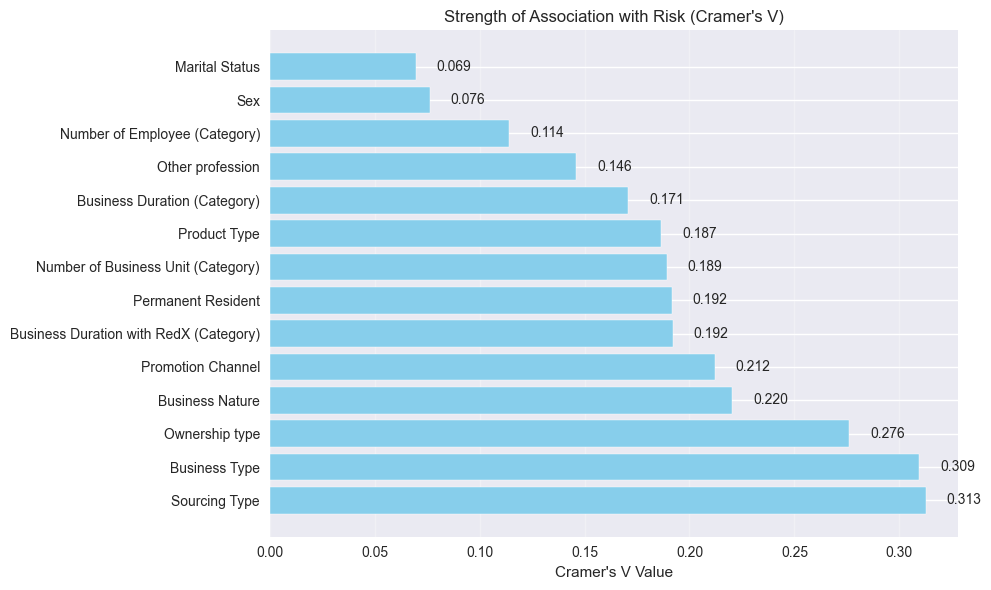

In [191]:
# Add the 4 new binned columns to existing categorical_cols
categorical_cols_list = categorical_cols.tolist() + [
    'Business Duration with RedX (Category)', 
    'Business Duration (Category)', 
    'Number of Employee (Category)', 
    'Number of Business Unit (Category)'
]
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramer's V for all categorical variables
print("Cramer's V — Strength of Association with Risk:")
print("="*50)
cramer_results = []
for col in categorical_cols_list:
    v = cramers_v(df_bins[col], df_bins['Risk'])
    cramer_results.append((col, v))

# Create results dataframe and display
cramer_df = pd.DataFrame(cramer_results, columns=['Variable', "Cramer's V"])
cramer_df = cramer_df.sort_values("Cramer's V", ascending=False)
display(cramer_df)

# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.barh(cramer_df['Variable'], cramer_df["Cramer's V"], color='skyblue')
plt.xlabel("Cramer's V Value")
plt.title("Strength of Association with Risk (Cramer's V)")
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()


###  Cramer's V — Strength of Association (Categorical vs Risk)

Strongest Risk Associations:
1. Business Type & Sourcing Type show highest correlation with risk (Cramer's V ≈ 0.31)
2. Ownership Type & Business Duration with RedX are strong secondary predictors
3. Business Units & Employee Count show moderate but meaningful risk relationships

Weakest Risk Associations:
1. Demographic factors (Sex, Marital Status) have minimal impact on risk classification
2. Personal attributes show negligible correlation with credit risk

Conclusion: Business operational characteristics drive risk classification, while demographic factors have limited predictive power.


In [53]:
df.columns

Index(['Ownership type', 'Sex', 'Trade License', 'Sourcing Type',
       'Promotion Channel', 'Business Type', 'Business Duration\n(Years)',
       'Product Type', 'Availability of separate office', 'Marital Status',
       'Permanent Resident', 'Other profession',
       'Business Duration with RedX\n(Months)', 'Number of Business Unit',
       'Number of Employee', 'Business Nature', 'Risk Score', 'Risk'],
      dtype='object')

In [56]:
features=["Trade License", "Business Duration\n(Years)", 
    "Availability of separate office", "Business Duration with RedX\n(Months)",
    "Number of Business Unit","Number of Employee","Ownership type", "Sex", "Sourcing Type",
       "Promotion Channel", "Business Type", "Product Type", "Availability of separate office", "Marital Status",
       "Permanent Resident", "Other profession",  "Business Nature"] 

In [57]:
target="Risk"

# Data Preparation for Modeling

In [58]:
df_model=df[features+[target]].copy()
df_model.head()

,Trade License,Business Duration\n(Years),Availability of separate office,Business Duration with RedX\n(Months),Number of Business Unit,Number of Employee,Ownership type,Sex,Sourcing Type,Promotion Channel,Business Type,Product Type,Availability of separate office,Marital Status,Permanent Resident,Other profession,Business Nature,Risk
0,1,6.0,1,6,1,4,LTD,male,Foreign Source,Online only (FB + Other),F-commerce+ E-commerce,Food items,1,Married,Outside Dhaka,Yes,Seasonal Product,Bad
1,0,2.0,1,7,2,11,Partnerships,female,Foreign Source,Online only (FB + Other),E-commerce (website) only,Clothing & Accessories,1,Unmarried,Outside Dhaka,No,Seasonal Product,Bad
2,0,7.0,1,36,1,4,Sole Proprietorships,male,Foreign Source,Only Facebook,F-commerce only,Clothing & Accessories,1,Unmarried,Outside Dhaka,Yes,Seasonal Product,Bad
3,0,8.0,1,40,2,4,Partnerships,male,Own Product,Online only (FB + Other),E-commerce (website) only,Electronics & Gadget,1,Married,Outside Dhaka,No,Seasonal Product,Good
4,0,1.0,1,12,2,1,Partnerships,male,Local Source,Online only (FB + Other),E-commerce (website) only,Cosmetics,1,Unmarried,Outside Dhaka,Yes,Seasonal Product,Bad


In [59]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Selecting All Categorical Columns (Excluding Target Variable)

In [60]:
cat_cols=df_model.select_dtypes(include="object").columns.drop("Risk")

# Initializing an Empty Dictionary to Store Label Encoders

In [61]:
le_dict={}

# Categorical Columns for Feature Engineering

In [62]:
cat_cols

Index(['Ownership type', 'Sex', 'Sourcing Type', 'Promotion Channel',
       'Business Type', 'Product Type', 'Marital Status', 'Permanent Resident',
       'Other profession', 'Business Nature'],
      dtype='object')

# Importing LabelEncoder for Encoding Categorical Variables

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
for col in cat_cols:
    le=LabelEncoder()
    df_model[col]=le.fit_transform(df_model[col])
    le_dict[col]=le
    joblib.dump(le,f"{col}_encoder.pkl")

# Encoding Categorical Features and Saving Label Encoders for Future Use

In [65]:
le_target=LabelEncoder()

In [66]:
target

'Risk'

# Encoding the Target Variable (Risk) Using LabelEncoder

In [67]:
df_model[target]=le_target.fit_transform(df_model[target])
df_model[target]

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    1
997    0
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

In [68]:
df_model[target].value_counts()

Risk
1    636
0    364
Name: count, dtype: int64

# Saving the Target Variable Encoder as a Joblib File

In [69]:
joblib.dump(le_target, "1target_encoder.pkl")

['1target_encoder.pkl']

In [70]:
df_model.head()

,Trade License,Business Duration\n(Years),Availability of separate office,Business Duration with RedX\n(Months),Number of Business Unit,Number of Employee,Ownership type,Sex,Sourcing Type,Promotion Channel,Business Type,Product Type,Availability of separate office,Marital Status,Permanent Resident,Other profession,Business Nature,Risk
0,1,6.0,1,6,1,4,1,1,0,1,2,3,1,0,1,1,1,0
1,0,2.0,1,7,2,11,2,0,0,1,0,0,1,1,1,0,1,0
2,0,7.0,1,36,1,4,3,1,0,2,1,0,1,1,1,1,1,0
3,0,8.0,1,40,2,4,2,1,2,1,0,2,1,0,1,0,1,1
4,0,1.0,1,12,2,1,2,1,1,1,0,1,1,1,1,1,1,0


# Splitting Data into Features and Target for model training

In [72]:
from sklearn.model_selection import train_test_split
X=df_model.drop(target, axis=1)
y=df_model[target]

In [73]:
X

,Trade License,Business Duration\n(Years),Availability of separate office,Business Duration with RedX\n(Months),Number of Business Unit,Number of Employee,Ownership type,Sex,Sourcing Type,Promotion Channel,Business Type,Product Type,Availability of separate office,Marital Status,Permanent Resident,Other profession,Business Nature
0,1,6.0,1,6,1,4,1,1,0,1,2,3,1,0,1,1,1
1,0,2.0,1,7,2,11,2,0,0,1,0,0,1,1,1,0,1
2,0,7.0,1,36,1,4,3,1,0,2,1,0,1,1,1,1,1
3,0,8.0,1,40,2,4,2,1,2,1,0,2,1,0,1,0,1
4,0,1.0,1,12,2,1,2,1,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1.7,0,8,1,9,0,0,0,0,2,1,0,1,1,1,1
996,1,5.0,0,26,4,9,2,1,1,3,0,4,0,0,0,0,0
997,1,1.7,0,10,1,11,3,1,0,2,2,2,0,0,1,1,1
998,0,1.7,0,10,4,11,3,1,0,2,1,1,0,1,1,0,0


In [74]:
y

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    1
997    0
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

# Splitting Data into Training and Testing Sets with Stratified Sampling

In [75]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, stratify=y, random_state=1)


# Checking the Shape of the Training Feature Set

In [76]:
X_train.shape

(800, 17)

# Checking the Shape of the Testing Feature Set

In [77]:
X_test.shape

(200, 17)

In [81]:
import sys
!{sys.executable} -m pip install xgboost


In [82]:
#hyper function to train the models. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV



# Defining a Function to Train Models Using GridSearchCV and Evaluate Accuracy

In [84]:
def train_model(model,param_grid,X_train, y_train, X_test, y_test):
    grid=GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model= grid.best_estimator_
    y_pred=best_model.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    return best_model, acc, grid.best_params_
    

# Initializing a Decision Tree Classifier and Defining Its Hyperparameter Grid for Tuning

In [85]:
dt = DecisionTreeClassifier(random_state=1, class_weight='balanced')
dt_param_grid={
    "max_depth": [3,5,7,10,None],
    "min_samples_split":[2,5,10], 
    "min_samples_leaf":[1,2,4]
}

# Training the Decision Tree Model and Retrieving the Best Estimator, Accuracy, and Optimal Parameters

In [86]:
best_dt,acc_dt,params_dt=train_model(dt, dt_param_grid,X_train, y_train, X_test, y_test)

# Display the Accuracy Score of the Trained Decision Tree Model

In [87]:
print("Decision Tree Accurancy", acc_dt)

Decision Tree Accurancy 0.775


# Displaying the Best Hyperparameters Selected for the Decision Tree Model

In [90]:
print("Best parameters",params_dt)

Best parameters {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


# Initializing Balanced Random Forest Classifier

In [91]:
rf=RandomForestClassifier(random_state=1, class_weight="balanced",n_jobs=-1)

# Hyperparameter Tuning with Grid Search

In [93]:
rf_param_grid={
    "n_estimators":[100,200],
    "max_depth":[5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]

}
best_rf,acc_rf,params_rf=train_model(rf,rf_param_grid,X_train, y_train, X_test, y_test)

# Display the Accuracy Score of the Trained Random Forest Model

In [94]:
print("Random Forect Accurancy:",acc_rf)

Random Forect Accurancy: 0.83


# Displaying the Best Hyperparameters Selected for the Random Forest Model

In [95]:
print("Best params:",params_rf)

Best params: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


# Initializing an Extra Trees Classifier

In [96]:
et=ExtraTreesClassifier(random_state=1,class_weight="balanced",n_jobs=-1)

# Defining the Hyperparameter Grid for the Extra Trees Classifier

In [97]:
et_param_grid={
    "n_estimators":[100,200],
    "max_depth":[5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]

}

# Training Optimized Extra Trees Model

In [98]:
best_et,acc_et,params_et=train_model(et,et_param_grid,X_train, y_train, X_test, y_test)

# Display the Accuracy Score of the Trained Extraa Tree Classifier Model

In [99]:
print("Extraa Trees Accurancy",acc_et)

Extraa Trees Accurancy 0.845


#  Making Predictions on the Test Set Using the Best Extra Trees Model

In [112]:
best_et.predict(X_test)

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0])

# Persisting Optimized Credit Risk Model

In [113]:
joblib.dump(best_et, "1extra_trees_credit_model.pkl")

['1extra_trees_credit_model.pkl']